**Breast Cancer Prediction:**


*The objective of breast cancer prediction is early detection and diagnosis. 
Early detection of breast  cancer  significantly  improves  the  chances of
successful  treatment and patient survival. By predicting the likelihood of 
breast  cancer  based  on  certain  features (such as age, genetic factors, 
mammographic findings, etc.).
we look more in detail about Mammographic.!*

In [2]:
import numpy as np # Multidimensional arrays and high-level mathematical functions.
import pandas as pd # Data Handling

In [14]:
%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt # Plotting 2D graphics
import matplotlib.gridspec as gridspec # Subplot layout and arrangement in figures.
import mpld3 as mpl # Interactive data visualizations.

In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
#Import models from scikit learn module:
from sklearn.model_selection import train_test_split # To split train and test data
from sklearn.linear_model import LogisticRegression # Model here we used
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

**DATASET**

In [17]:
df = pd.read_csv("/kaggle/input/breast-cancer-data/data.csv",header = 0)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**Data Preprocessing:**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Since there is no missing values and we need to Clean and Prepare.

**Cleaning the Data**

In [6]:
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

**Preparing**

In [8]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [9]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Exploratory Data Analysis**

In [10]:
df.describe() # Exploreing data 

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


*Univariate Analysis*

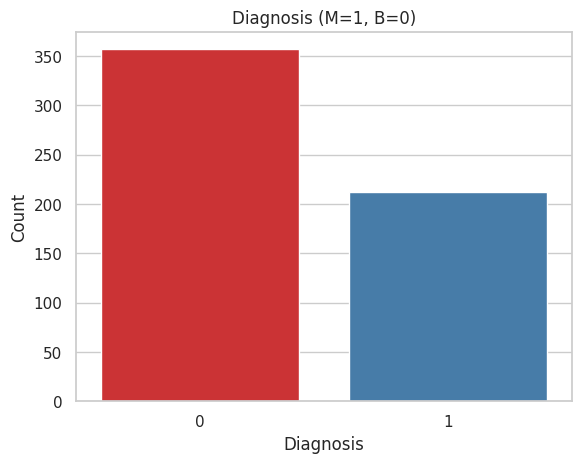

In [15]:
sns.set(style="whitegrid")  # Set the background style of the plot
sns.countplot(x='diagnosis', data=df, palette="Set1")
plt.title('Diagnosis (M=1, B=0)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

*Bivariate Analysis*

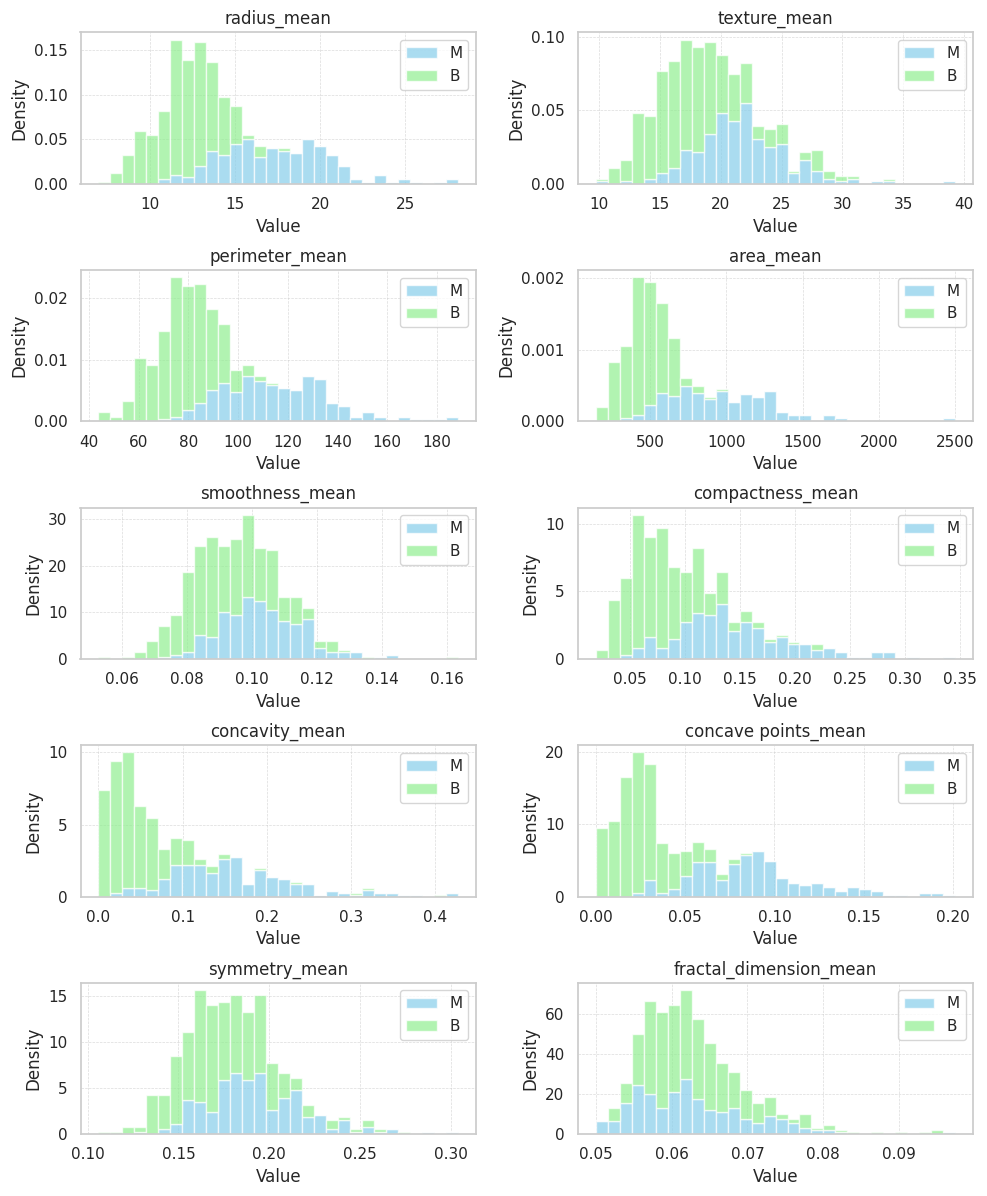

In [16]:
features_mean = list(df.columns[1:11])
dfM = df[df['diagnosis'] == 1]
dfB = df[df['diagnosis'] == 0]
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,12))
colors = ['skyblue', 'lightgreen']
for idx, ax in enumerate(axes.flat):
    ax.hist([dfM[features_mean[idx]], dfB[features_mean[idx]]],
            bins=30, alpha=0.7, stacked=True, density=True,
            color=colors, label=['M', 'B'])

    ax.set_title(features_mean[idx], fontsize=12)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.legend()
    
    # Add gridlines
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Add layout adjustments
plt.tight_layout()
plt.show()


correlation analysis

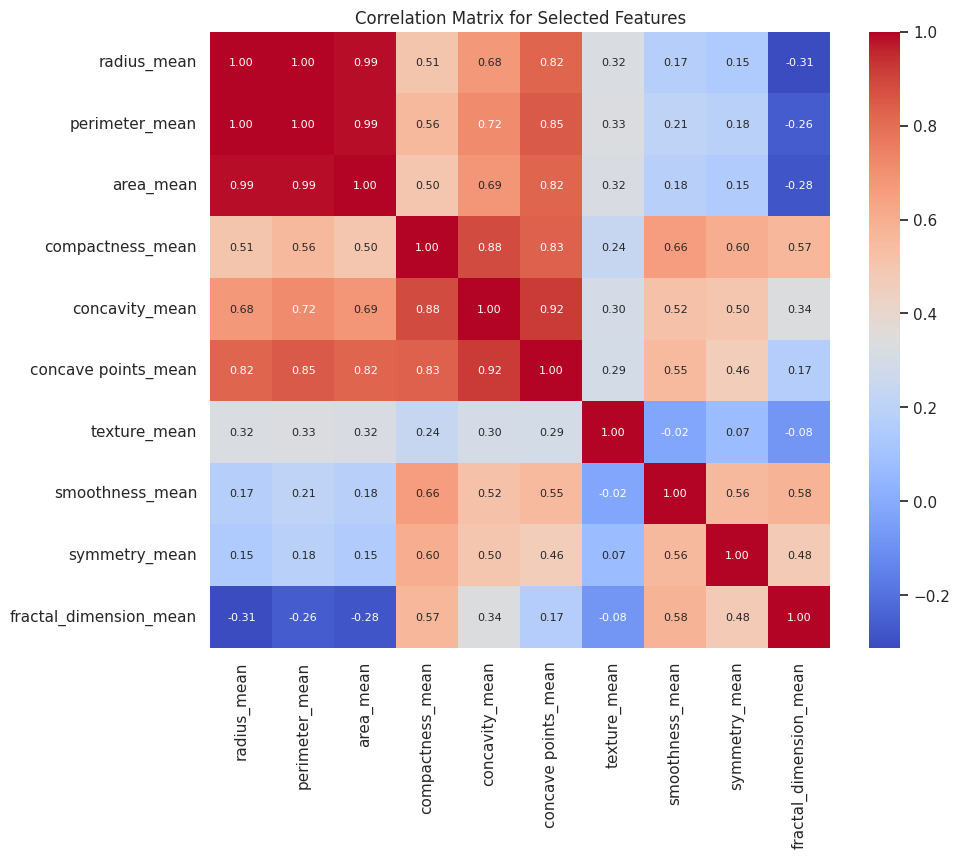

In [18]:
# Select specific columns for correlation analysis
selected_features = ['radius_mean', 'perimeter_mean', 'area_mean', 
                     'compactness_mean', 'concavity_mean', 'concave points_mean', 
                     'texture_mean', 'smoothness_mean', 'symmetry_mean', 'fractal_dimension_mean']
subset_df = df[selected_features] #Subset
correlation_matrix = subset_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Selected Features')
plt.show()


Multivariate Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


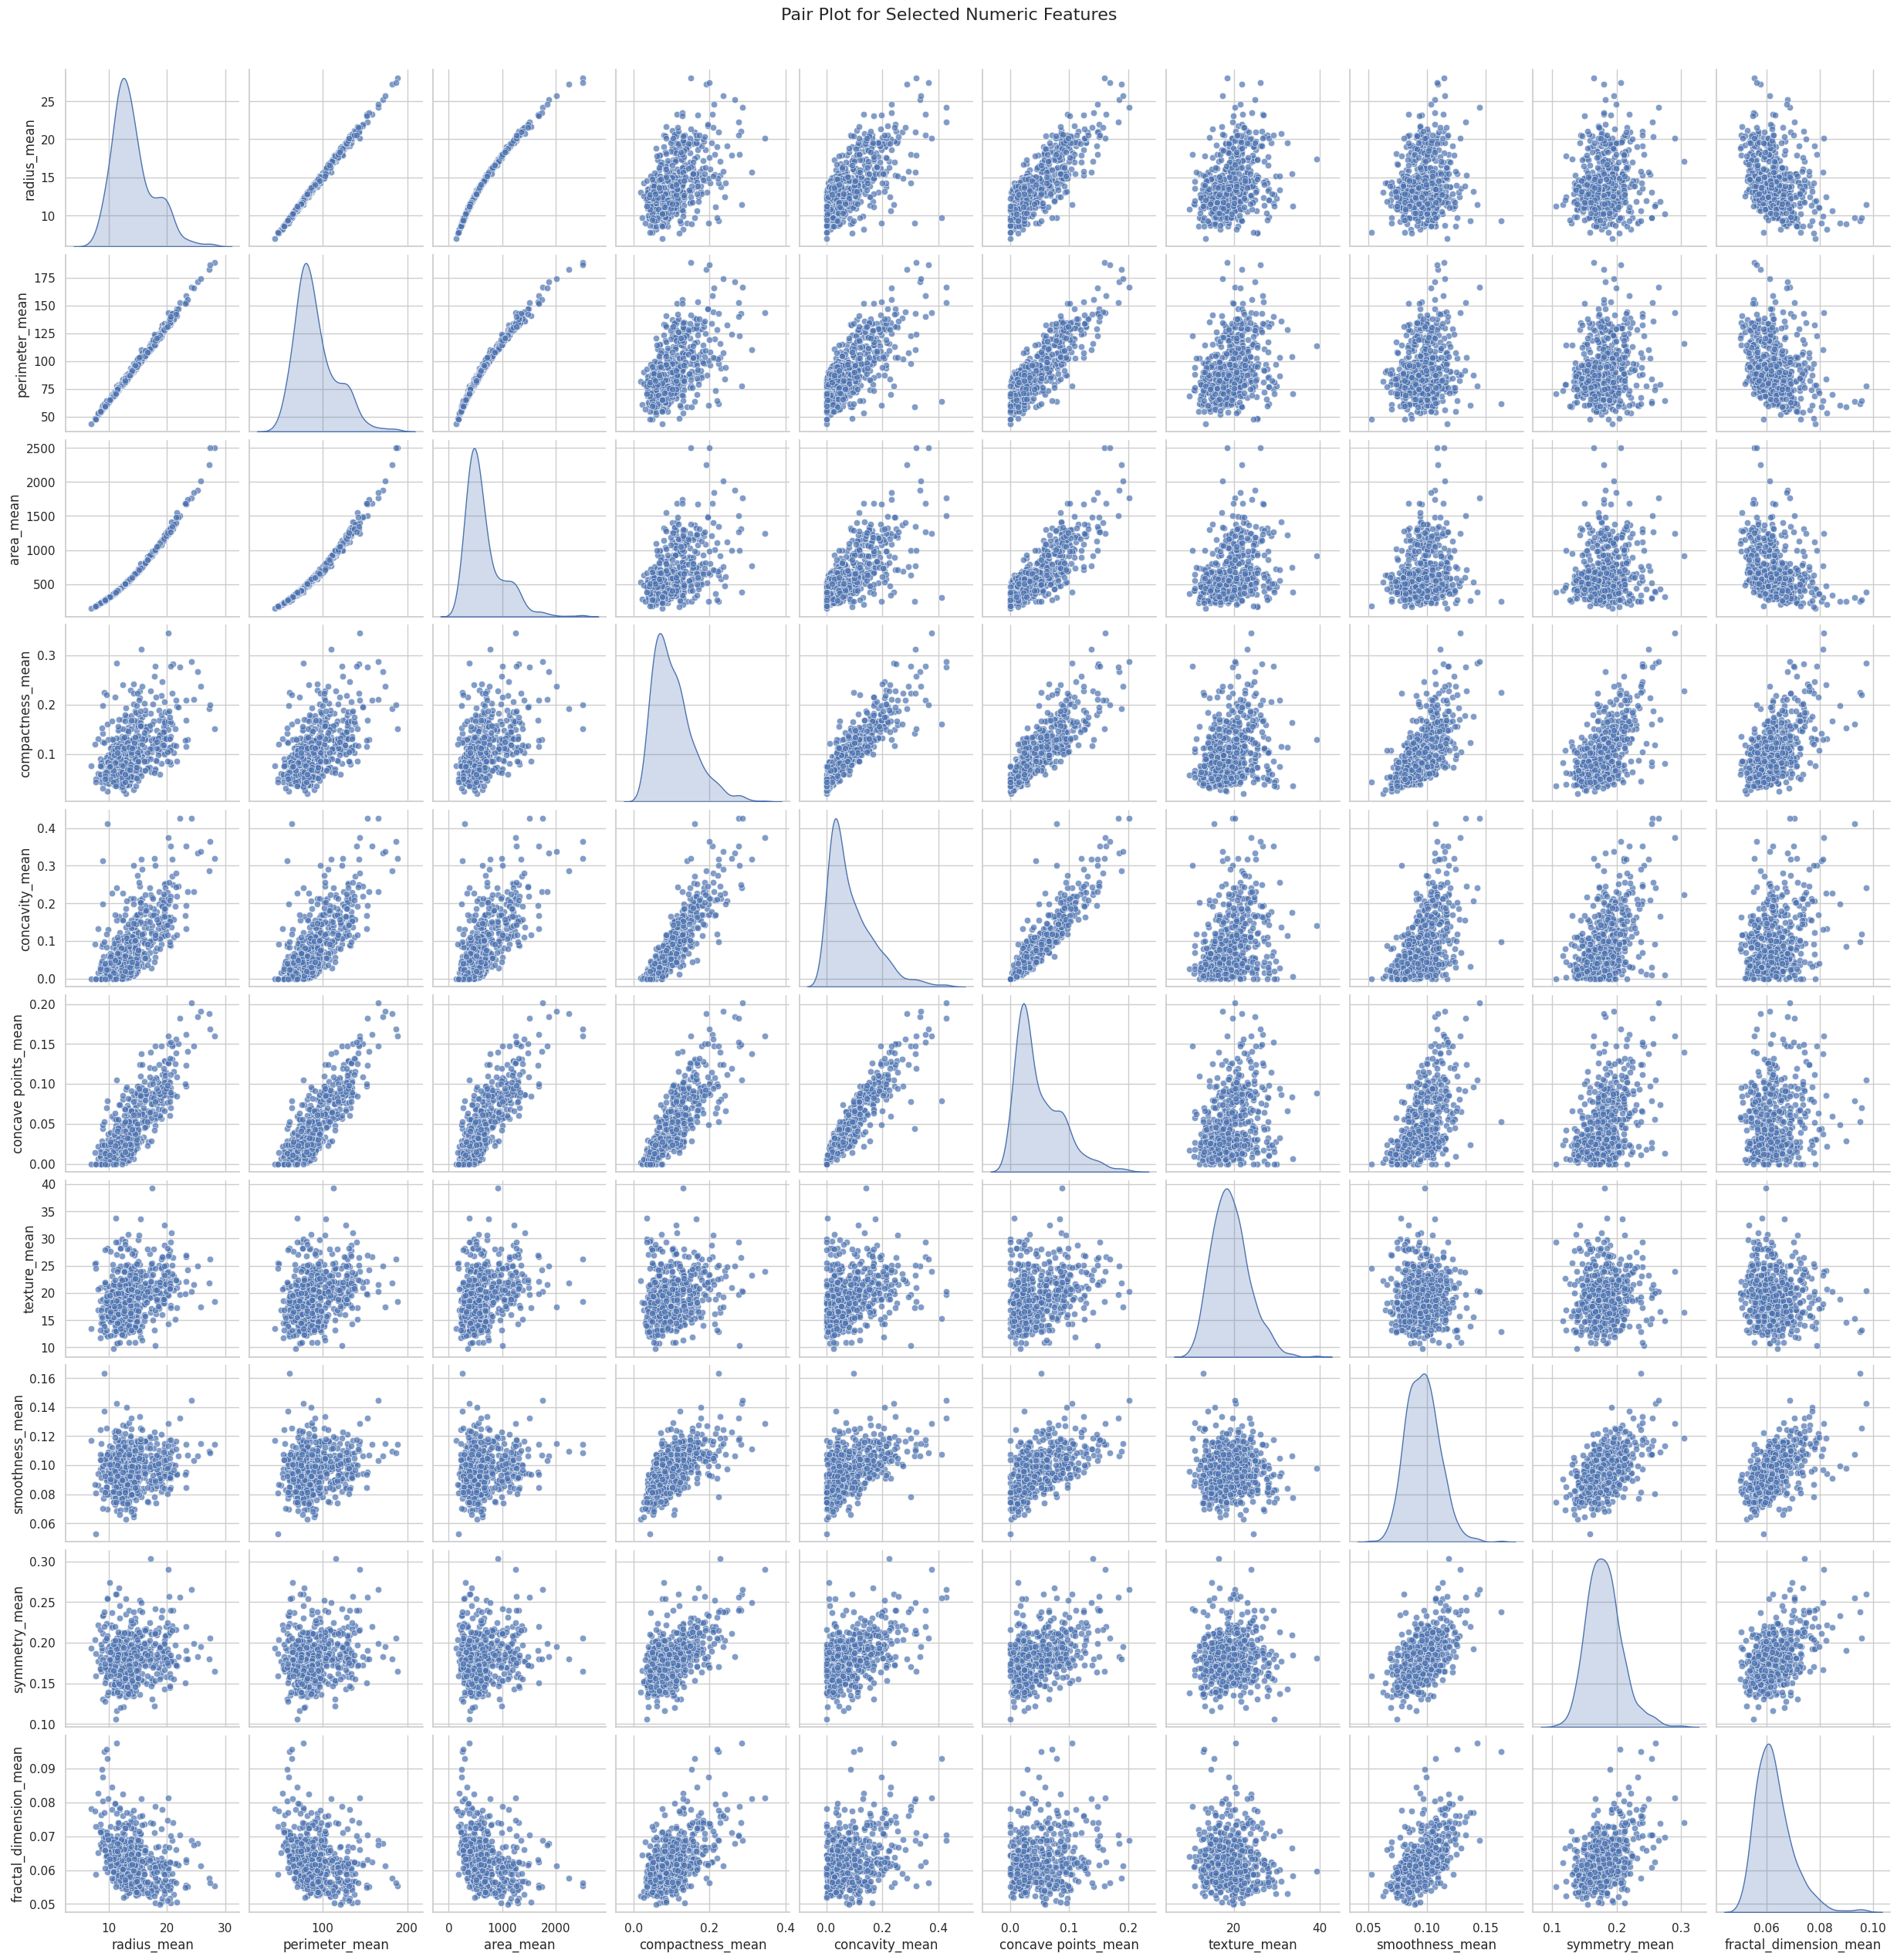

In [20]:
sns.pairplot(df[selected_features], diag_kind='kde', plot_kws={'alpha':0.7})
plt.suptitle('Pair Plot for Selected Numeric Features', y=1.02, fontsize=16)
plt.show()

**Exploratory Data Analysis :**

**Analysis Report**

*1. **Mean values of cell size and shape (radius, perimeter, area, compactness, concavity, and concave points) can help identify cancer:** When these values are larger, it often indicates a malignant tumor. This means that malignant tumors tend to have cells that are bigger and more irregular in shape.*

*2. **Mean values of texture, smoothness, symmetry, and fractal dimension don't strongly indicate cancer:** These features don't show a clear difference between malignant and benign tumors. In other words, the texture of the cell, how smooth it is, or its symmetry and fractal dimension don't reliably tell us if the tumor is malignant or benign.*

*3. **No extreme unusual values were found:** Additionally, when looking at the histograms, there are no exceptionally large or small values that need special attention. The data seems consistent and doesn't require further cleanup due to outliers.*

**Categorical Data Encoding:** *Decision trees can naturally split based on categorical features and do not require special encoding techniques.*

**Data Spliting and Evaluation :**

In [36]:
def classification_model(model, data, predictors, outcome):
    # Split the data into predictors and target
    X = data[predictors]
    y = data[outcome]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    predictions = model.predict(X_test)
    
    # Calculate accuracy on the test set
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: {:.3f}".format(accuracy))
    
    # Perform cross-validation with 5 folds and print mean cross-validation score
    cv_scores = cross_val_score(model, X, y, cv=5)
    print("Cross-Validation Score: {:.3f}".format(np.mean(cv_scores)))
    


In [39]:
predictor_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']
outcome_var='diagnosis'

**Decision Tree Model**

In [42]:
model = DecisionTreeClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy: 0.919
Cross-Validation Score: 0.927


**Randome Forest**

In [41]:
predictor_var = features_mean
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classification_model(model, traindf, predictor_var,outcome_var)

Accuracy: 0.942
Cross-Validation Score: 0.918


**Logistic Regression model**

In [44]:
predictor_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']
outcome_var='diagnosis'
model=LogisticRegression()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy: 0.884
Cross-Validation Score: 0.895


In [45]:
predictor_var = ['radius_mean']
model=LogisticRegression()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy: 0.860
Cross-Validation Score: 0.894


**Utilizing all available features enhances prediction accuracy, and Random forest Model offers an added advantage by providing a feature importance matrix. This matrix can be leveraged to identify key features. Let's extract the top 5 features based on their importance scores and use them as predictors in the model.**

**Testing data set**

In [46]:
predictor_var = features_mean
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classification_model(model, testdf,predictor_var,outcome_var)

Accuracy: 1.000
Cross-Validation Score: 0.951


**Conclusion:**

*In this analysis, the most effective model for diagnosing breast cancer is the Random Forest model utilizing the top 5 predictors: 'concave points_mean', 'area_mean', 'radius_mean', 'perimeter_mean', and 'concavity_mean'. This model achieves an impressive prediction accuracy of approximately 94% and demonstrates a cross-validation score of around 93% on the test dataset.

In future iterations of this analysis, I plan to explore opportunities for further improvement by fine-tuning the model and experimenting with additional algorithms.*